# **Introduction to EDA/Modelling for Multi-Class Prediction of Obesity Risk**

![easy_peasy_EDA](https://th.bing.com/th/id/OIG4.Z3X2KIgpwXplIxzX6Z90?pid=ImgGn)

The notebook has the **Multiclass Classification with a Obesity Risk competition, Playground Season-4 Episode-2**, as object.

The notebook is structured as a series of cells and comments, from data exploration to building and optimizing a first starter model using XGBoost. By following it you can understabnd both the data problem and grasp the actions to be taken with similar tabular data problems.

The approach is to explore data using the essential commands for tabular and chart representations. Often, on Kaggle Notebooks for competitions, EDA is weighted with tons of charts and plots that you cannot understand what they serve for, based on the principle "The More The Merrier". The idea is instead to just go to the point and show the relevant plots and keyt understanding in a dataset that could help you to devise the better strategies and feature engineering.

The modelling part is also striving to just do the essential, hence you will find a single model devised to show how far you can go with the state of the art in tabular data modelling, i.e. XGBoost.

The notebook is arrange into six parts, with sections:

1. Data loading and first exploration
2. Target analysis
3. EDA and data preparation
4. Modelling
5. Explainability
6. Preparation of the submission

Most of the used approaches / code snippets can be found on the books:

1. The Kaggle Book by Konrad Banachewicz and Luca Massaron
2. The Kaggle Workbook by Konrad Banachewicz and Luca Massaron
3. Developing Kaggle Notebooks by Gabriel Preda

for a wider discussion of the topics of EDA and modelling just refer to these books

## 1.0 Data loading and first exploration

First, the basic Python packages (more will be loaded later, when needed)

In [1]:
import numpy as np
import pandas as pd

Load the data and set the id as index

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv").set_index("id")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv").set_index("id")

In [3]:
train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
train.head(5).T

id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


In [5]:
test.head(5).T

id,20758,20759,20760,20761,20762
Gender,Male,Female,Female,Male,Female
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


The dataset seems similar to "Obesity based on eating habits & physical cond" (https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels) which has been derived from:

Palechor, Fabio Mendoza, and Alexis de la Hoz Manotas. "Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico." Data in brief 25 (2019): 104344.
(https://www.sciencedirect.com/science/article/pii/S2352340919306985)

The research paper introduces a dataset designed for estimating obesity levels in individuals across Mexico, Peru, and Colombia. The estimation relies on factors such as eating habits and physical condition. The dataset encompasses 17 attributes and 2111 records, each labeled with the class variable NObesity (Obesity Level). This variable facilitates the classification of data into categories including Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

Of the total data, 77% was synthetically generated using the Weka tool and the SMOTE filter, while the remaining 23% was directly collected from users through a web platform. The dataset serves as a valuable resource for developing intelligent computational tools capable of identifying an individual's obesity level. Additionally, it can be utilized for constructing recommender systems aimed at monitoring and addressing obesity levels. 

In particular we can deduct that:
* 'Gender', 'Age', 'Height', 'Weight' are physical attributes
* 'family_history_with_overweight' points out to familiarity with obesity
* FAVC = Frequent consumption of high caloric food
* FCVC = Frequency of consumption of vegetables
* NCP = Number of main meals
* CAEC = Consumption of food between meals
* SMOKE = tobacco usage
* CH20 = Consumption of water daily
* SCC = Calories consumption monitoring
* FAF = Physical activity frequency
* TUE = Time using technology devices
* CALC = Consumption of alcohol
* MTRANS = Transportation used

The target is estracted from the train

In [6]:
target = train["NObeyesdad"]
train = train.drop("NObeyesdad", axis="columns")

## 2.0 Target analysis

By examining the distribution of the target we can figure that: 

1. it is a multiclass problem, with 7 class
2. the classes are distributed differently but there are not extreme differences in their proportions (expected probability)
3. However, the most frequent class (Obesity_Type_III) has almost the double of probability of the least frequent one (Overweight_Level_I), hence, when defining the cross-validation strategy when should consider a target stratified one thus such different prior probabilities will be reflected also in the test set as much exactly as possible.

In [7]:
target.value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [8]:
target.value_counts() / len(target)

NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: count, dtype: float64

Here we represent the situation with a plot, ordering the classes based on overweight

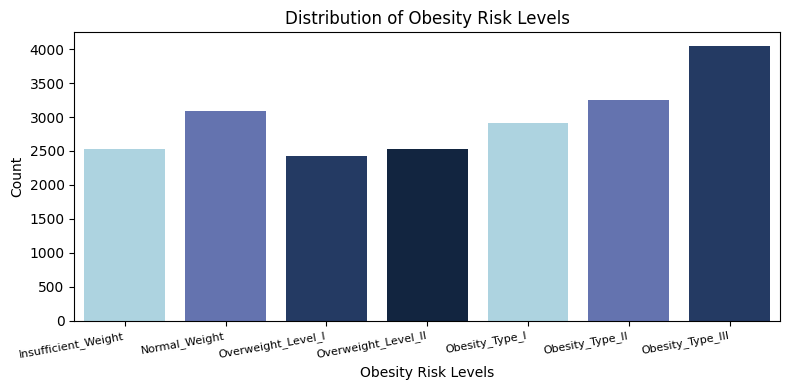

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
cmap_custom = ListedColormap(color_list)

sorted_labels = ['Insufficient_Weight', 'Normal_Weight', 
 'Overweight_Level_I', 'Overweight_Level_II', 
 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

plt.figure(figsize=(8, 4))
ax = sns.countplot(x=target, order=sorted_labels, palette=color_list)

plt.title('Distribution of Obesity Risk Levels')
plt.xlabel('Obesity Risk Levels')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right', fontsize=8)
plt.tight_layout() 
plt.show()

for modelling purposes, we convert the target, expressed by string labels, into numeric labels, using a custom implementation of Scikit-learn LabelEncoder that orders the encoded label based on the order we proposed before.

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, sorted_labels):
        self.classes_ = sorted_labels
        self.label_to_numeric_mapping = None

    def fit(self, y):
        self.label_to_numeric_mapping = {label: numeric for numeric, label in enumerate(self.classes_)}
        return self

    def transform(self, y):
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before transform")
        return y.map(self.label_to_numeric_mapping)

    def inverse_transform(self, y):
        if self.label_to_numeric_mapping is None:
            raise ValueError("fit method must be called before inverse_transform")
        return pd.Series(y).map({numeric: label for label, numeric in self.label_to_numeric_mapping.items()})

In [11]:
target_encoder = CustomLabelEncoder(sorted_labels)
target_encoder.fit(target)
target_numeric = target_encoder.transform(target)

In [12]:
target_numeric

id
0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: NObeyesdad, Length: 20758, dtype: int64

Using our enconder, we can rever back from numeric to string anytime:

In [13]:
target_encoder.inverse_transform(target_numeric)

id
0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

## 3.0 EDA and data preparation

Let's proceed to indeep explore and prepare the datasets (both the train and the test in parallel) for being suitable for modelling with both GLMs and Tree-based models

### 3.1 Missing values

Both train and test have no missing data

In [14]:
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [15]:
test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

### 3.2 Data Types and feature classification

Let's enumerate the numeric (continuous and ordinal) features fromt the categorical ones

In [16]:
train.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [17]:
categorical_features = train.columns[train.dtypes=="object"].tolist()
numeric_features = train.columns[train.dtypes!="object"].tolist()

All the categorical features have very few unique levels, making one-hot-encoding the best choice for this situation

In [18]:
train[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
dtype: int64

All the numeric features, have enough distinct values to confirm their are continuous ones

In [19]:
train[numeric_features].nunique()

Age       1703
Height    1833
Weight    1979
FCVC       934
NCP        689
CH2O      1506
FAF       1360
TUE       1297
dtype: int64

### 3.3 Plotting count and distribution pairs

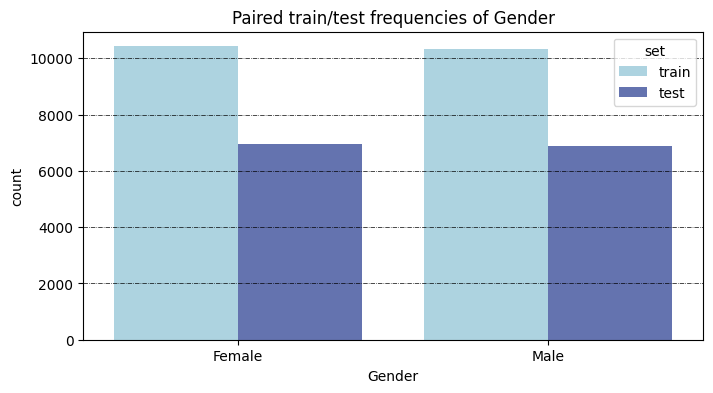

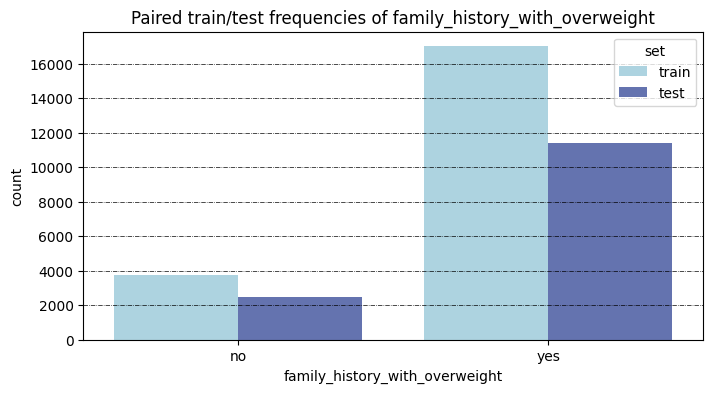

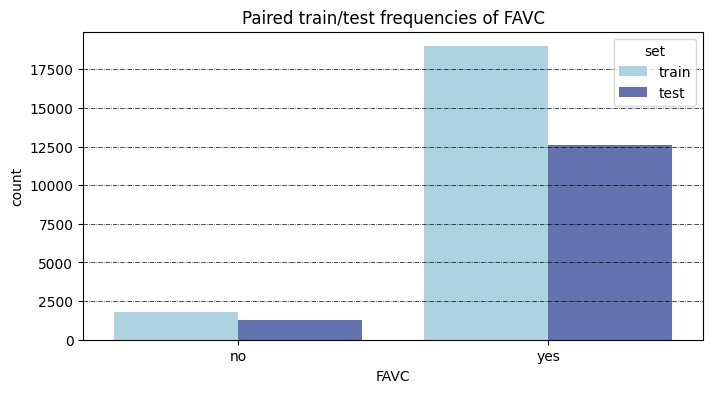

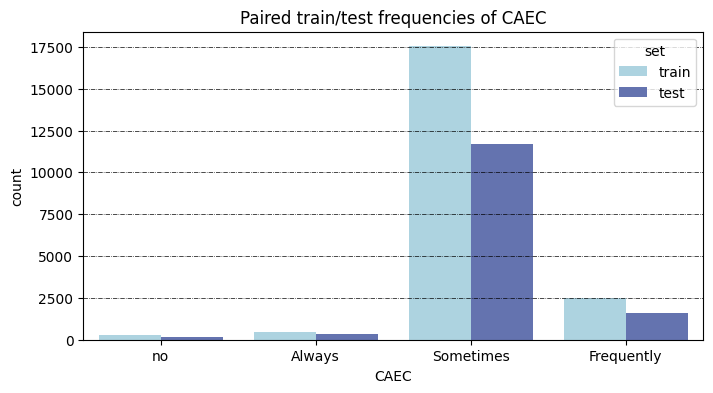

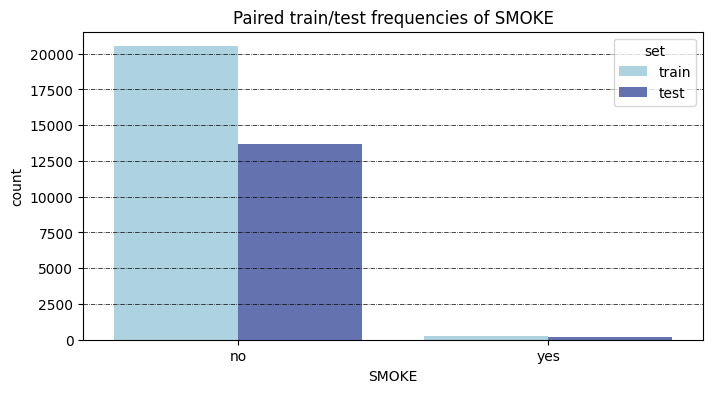

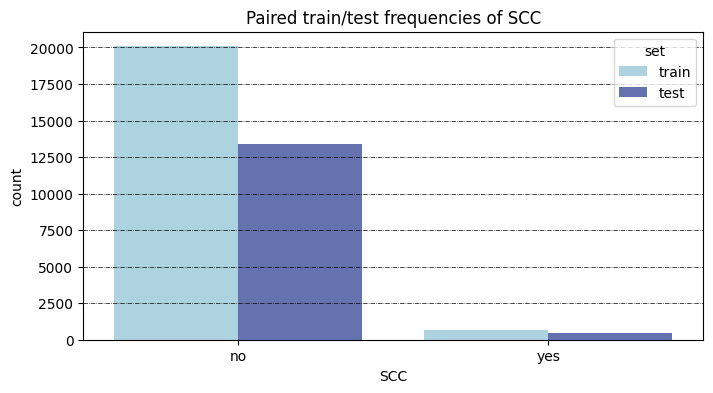

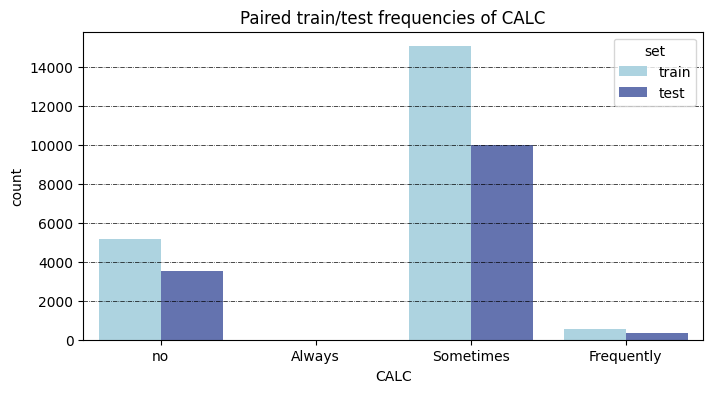

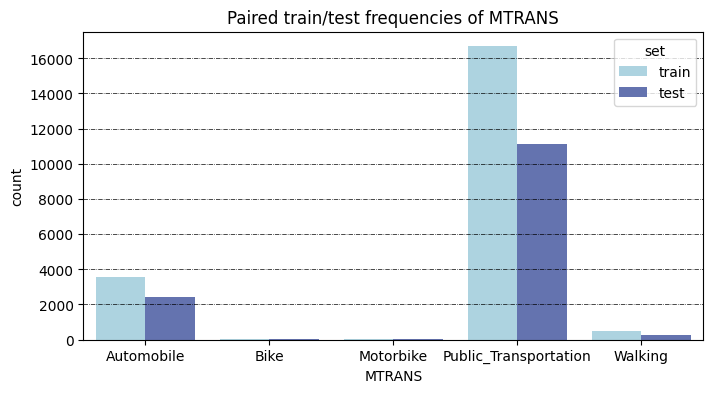

In [20]:
def plot_count_pairs(train, test, feature, hue="set", order=None, palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(x=feature, data=data_df, hue=hue, palette=color_list, order=order)
    plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
    ax.set_title(f"Paired train/test frequencies of {feature}")
    plt.show()
    
for feature in categorical_features:
    if feature in ["CAEC", "CALC"]:
        order = ["no", "Always", "Sometimes", "Frequently"]
    else:
        order = sorted(train[feature].unique())
    plot_count_pairs(train, test, feature=feature, order=order, palette=color_list)

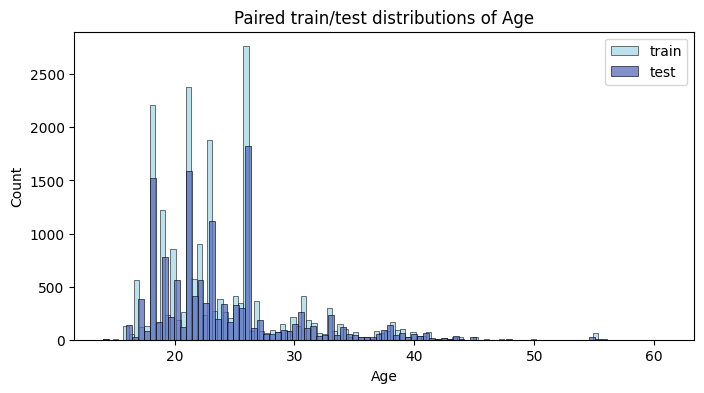

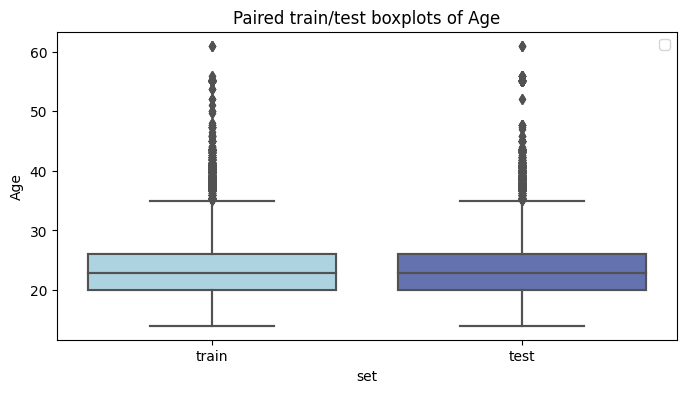

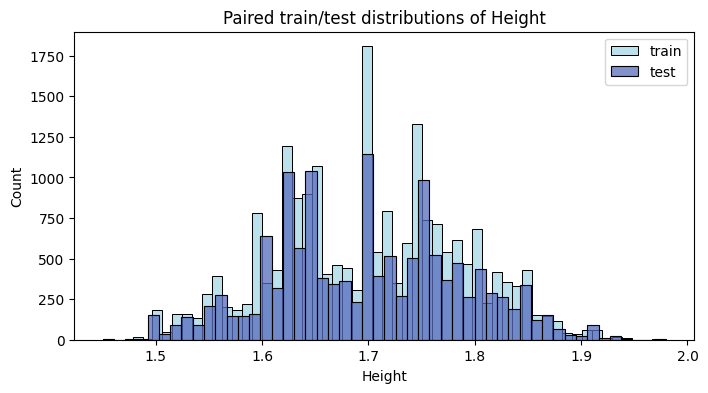

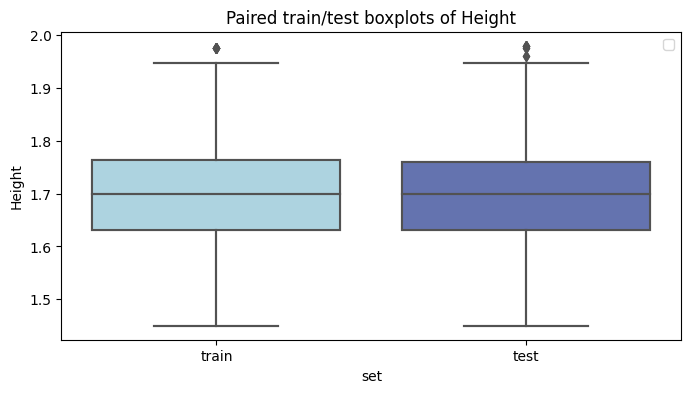

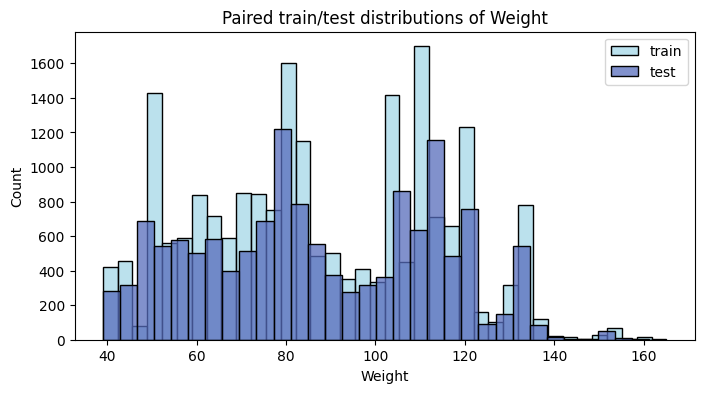

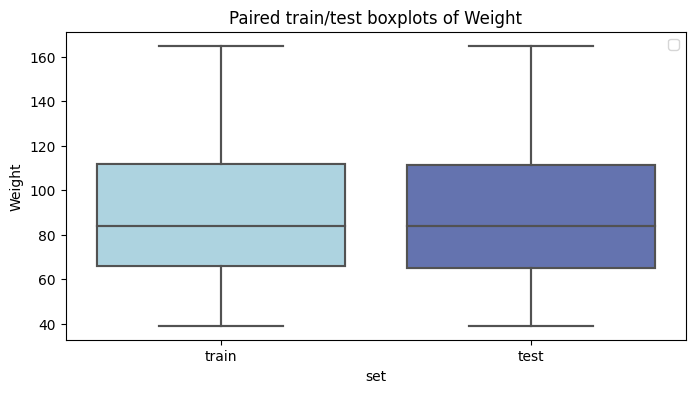

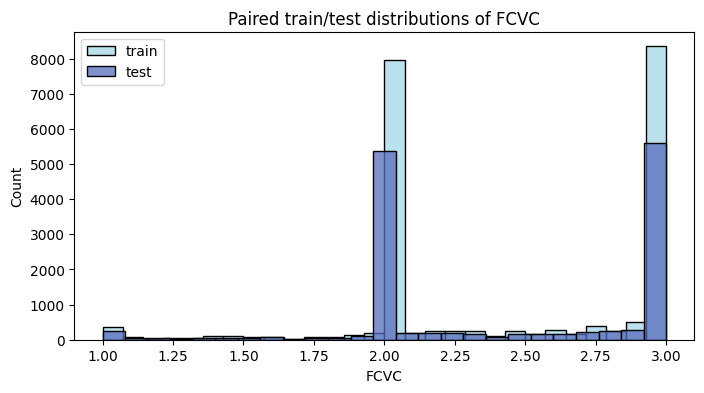

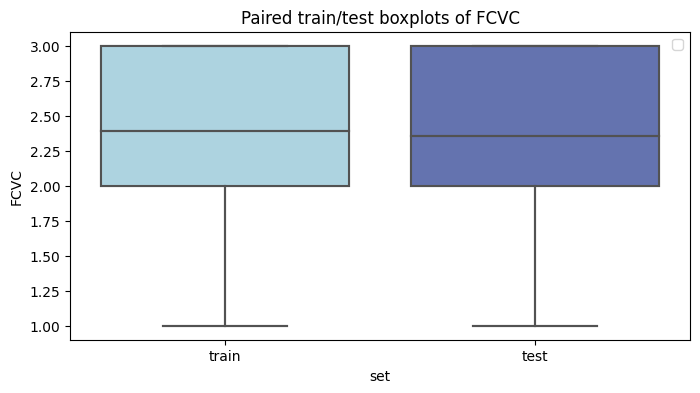

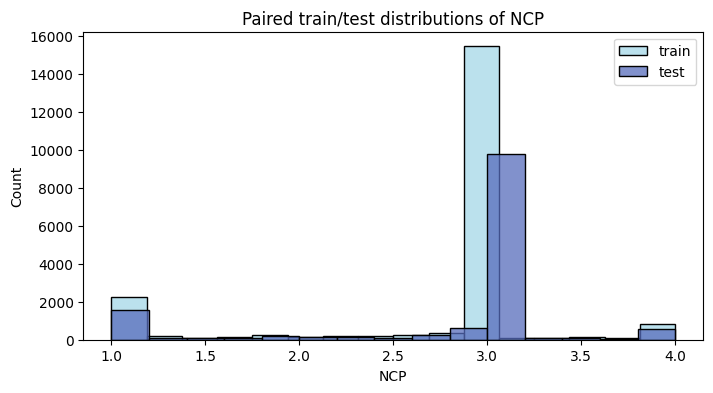

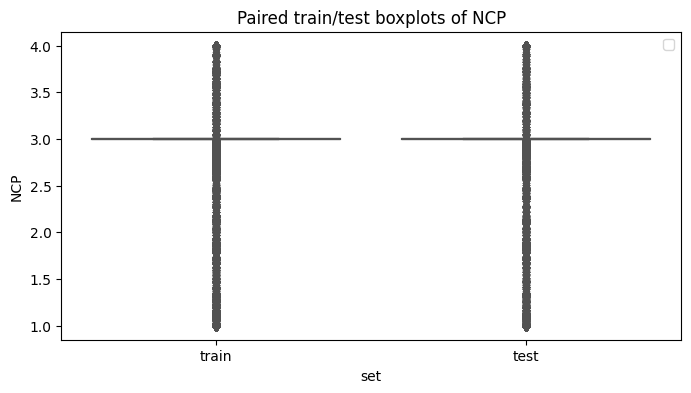

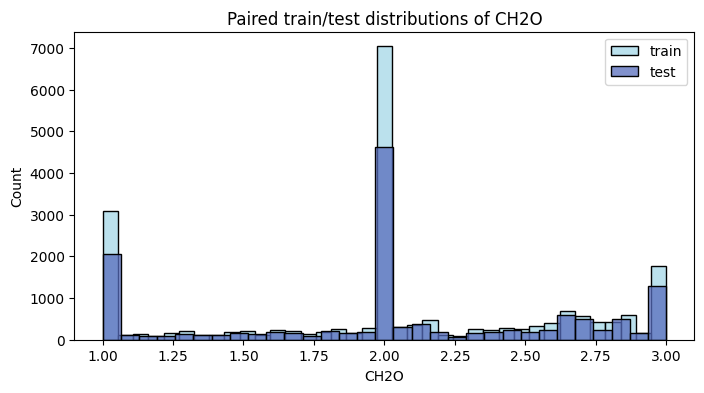

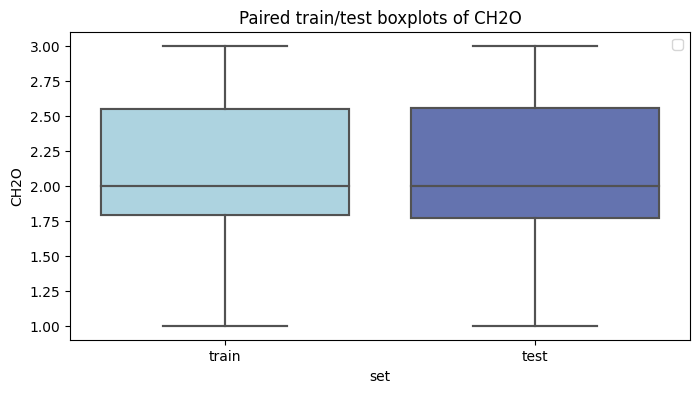

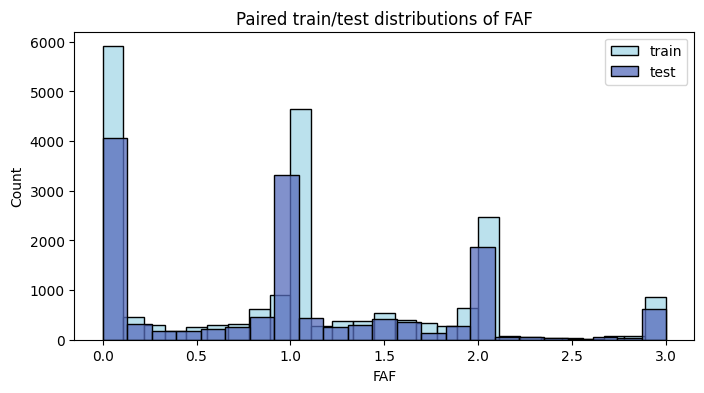

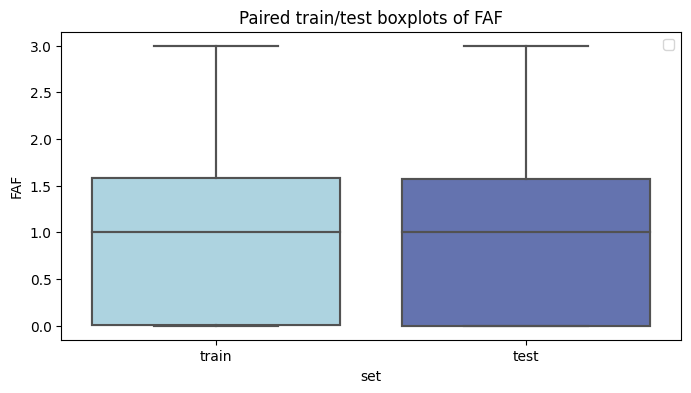

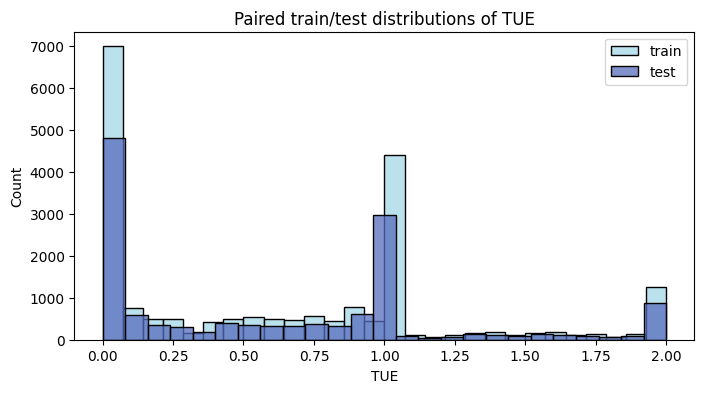

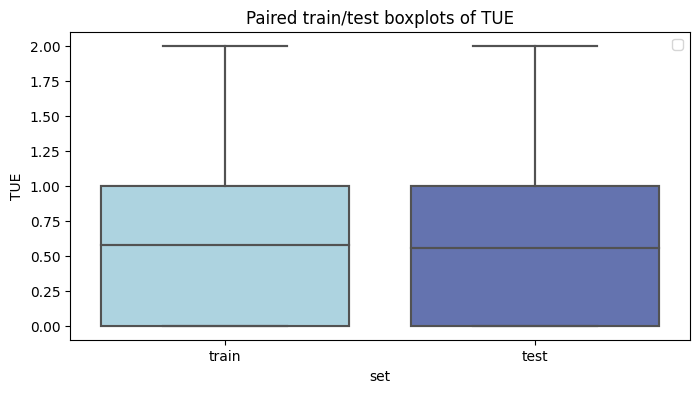

In [21]:
import warnings

def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g = sns.histplot(selection, color=palette[i], ax=ax, label=s)
    ax.set_title(f"Paired train/test distributions of {feature}")
    g.legend()
    plt.show()

def plot_distribution_pairs_boxplot(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g = sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=ax)
    ax.set_title(f"Paired train/test boxplots of {feature}")
    g.legend()
    plt.show()
    
for feature in numeric_features:
    plot_distribution_pairs(train, test, feature, palette=color_list)
    plot_distribution_pairs_boxplot(train, test, feature, palette=color_list)

### 3.4 Categorical encoding

We then proceed to process the categorical features by encoding them using the OneHotEncoder by Scikit-learn

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(pd.concat([train[categorical_features], test[categorical_features]], axis=0))

train_encoded = encoder.transform(train[categorical_features])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [23]:
test_encoded = encoder.fit_transform(test[categorical_features])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))

In [24]:
train_sum = train_encoded_df.sum(axis=0).astype(int)
test_sum = test_encoded_df.sum(axis=0).astype(int)

sum_df = pd.concat([train_sum, test_sum], axis=1, keys=['Train', 'Test'])
sum_df

,Train,Test
Gender_Female,10422,6965
Gender_Male,10336,6875
family_history_with_overweight_no,3744,2456
family_history_with_overweight_yes,17014,11384
FAVC_no,1776,1257
FAVC_yes,18982,12583
CAEC_Always,478,359
CAEC_Frequently,2472,1617
CAEC_Sometimes,17529,11689
CAEC_no,279,175


### 3.5 Adjusting categorical encodings

CALC_Always, being zero in training won't be used and there could be problems in the test if CALC is a relevant feature. We can then perform the combination of columns CALC_Always and CALC_Frequently in both train_encoded_df and test_encoded_df into a new column called 'CALC_Always|Frequently'. After creating the combined column, the original columns CALC_Always and CALC_Frequently are dropped.

In [25]:
combine_columns = ['CALC_Always', 'CALC_Frequently']

train_encoded_df['CALC_Always|Frequently'] = train_encoded_df[combine_columns].sum(axis=1)
test_encoded_df['CALC_Always|Frequently'] = test_encoded_df[combine_columns].sum(axis=1)

train_encoded_df = train_encoded_df.drop(columns=combine_columns).set_index(train.index)
test_encoded_df = test_encoded_df.drop(columns=combine_columns).set_index(test.index)

Before proceeding, let's also consider that CALC and CAEC are indeed ordinal features. We can replace them with an ordinal feature, too, to catch any linear effect due to these two features. 

In [26]:
levels = {"Always": 3, "Frequently": 2, "Sometimes": 1, "no": 0}
train["CALC_ord"] = train["CALC"].map(levels)
test["CALC_ord"] = test["CALC"].map(levels)
train["CAEC_ord"] = train["CAEC"].map(levels)
test["CAEC_ord"] = test["CAEC"].map(levels)

Let's now integrate the categorical encodings in our original train and test datasets, replacing the previous categorical 
features

In [27]:
train = pd.concat([train.drop(categorical_features, axis=1), train_encoded_df], axis=1)
test = pd.concat([test.drop(categorical_features, axis=1), test_encoded_df], axis=1)

As a furthermore check before proceeding modelling, let's test adversarial validation between the train and the test datasets in order to be sure that they are from the same distribution and there is no particular shift between them. This will ensure us that we should expect the same target distribution too.

### 3.6 Adversarial validation

We take the code for adversarial validation from the Kaggle Book: https://github.com/PacktPublishing/The-Kaggle-Book/blob/main/chapter_06/adversarial-validation-example.ipynb

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

X =  pd.concat([train, test], axis=0)
y = [0] * len(train) + [1] * len(test)

model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

roc-auc score: 0.499


Since the roc-auc score is about 0.5, we have a confirmation that train and test are from the same distribution.

### 3.7 Feature engineering

At this point we try to create some smart feature engineering. As a first step we calculate the Body Mass Index using the 'Height' and 'Weight' features. BMI is often used as an indicator of obesity and it better represents the relationship between weight and height. 

In [29]:
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

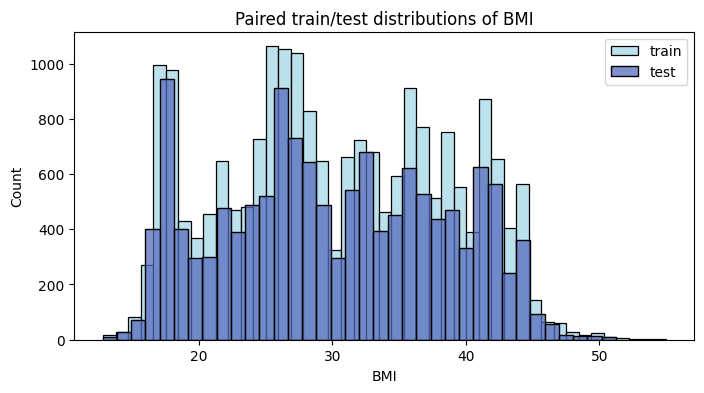

In [30]:
plot_distribution_pairs(train, test, feature="BMI", palette=color_list)

We then combine 'FAF' (Physical activity frequency) with 'TUE' (Time using technology devices) to create a feature representing the balance between physical activity and sedentary behavior.

In [31]:
train['Physical_Activity_Level'] = train['FAF'] - train['TUE']
test['Physical_Activity_Level'] = test['FAF'] - test['TUE']

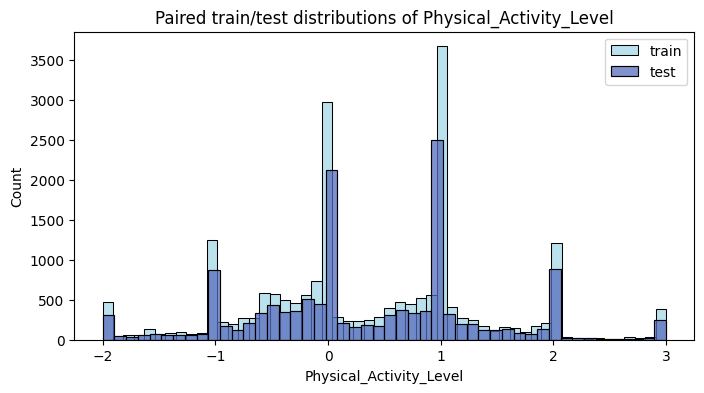

In [32]:
plot_distribution_pairs(train, test, feature="Physical_Activity_Level", palette=color_list)

Combine 'FCVC' (Frequency of consumption of vegetables) and 'NCP' (Number of main meals) to create a feature reflecting overall meal habits.

In [33]:
train['Meal_Habits'] = train['FCVC'] * train['NCP']
test['Meal_Habits'] = test['FCVC'] * test['NCP']

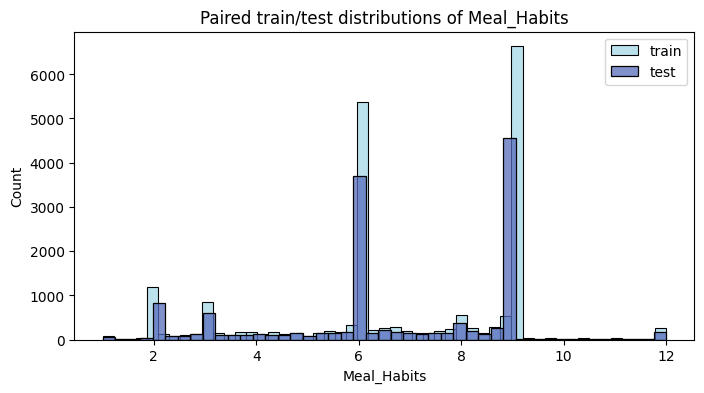

In [34]:
plot_distribution_pairs(train, test, feature="Meal_Habits", palette=color_list)

We also combine features like 'FCVC' (Frequency of consumption of vegetables) and 'FAVC' (Frequent consumption of high caloric food) to create a new feature representing overall nutrition habits.

In [35]:
(train['FAVC_yes'] - 2).unique

<bound method Series.unique of id
0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
20753   -1.0
20754   -1.0
20755   -1.0
20756   -1.0
20757   -1.0
Name: FAVC_yes, Length: 20758, dtype: float64>

In [36]:
train['Healthy_Nutrition_Habits'] = train['FCVC'] / ( 2 * train['FAVC_no'] - 1)
test['Healthy_Nutrition_Habits'] = test['FCVC'] / ( 2 * test['FAVC_no'] - 1)

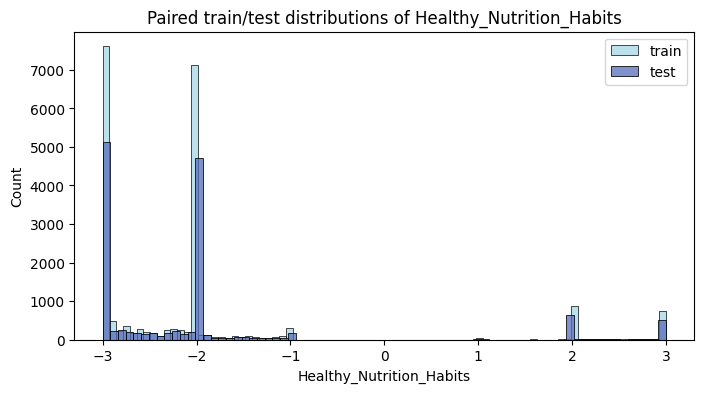

In [37]:
plot_distribution_pairs(train, test, feature="Healthy_Nutrition_Habits", palette=color_list)

We finally create a score based on the frequency of technology usage ('TUE') weighted by the age: essentially, it quantifies the average amount of time a person spends using technology per unit of their age

In [38]:
train['Tech_Usage_Score'] = train['TUE'] / train['Age']
test['Tech_Usage_Score'] = test['TUE'] / test['Age']

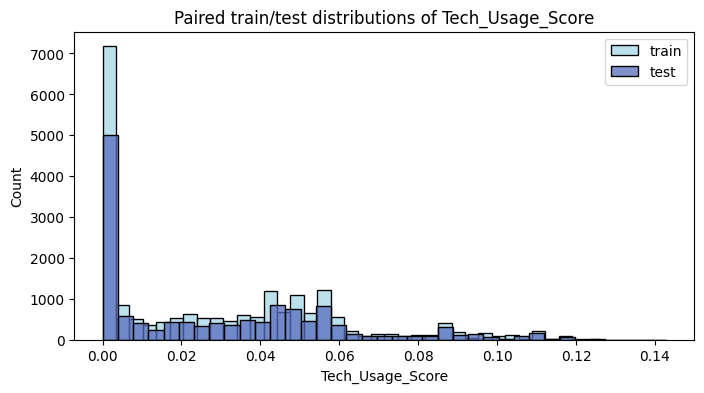

In [39]:
plot_distribution_pairs(train, test, feature="Tech_Usage_Score", palette=color_list)

Since this completes our data preparation, we store the resulting transformed train and test datasets, hence we can reuse them in other Kaggle Notebooks.

In [40]:
train['Tech_Usage_Score'] = train['TUE'] / train['Age']
test['Tech_Usage_Score'] = test['TUE'] / test['Age']

In [41]:
train.to_csv("train.csv")
test.to_csv("test.csv")
target.to_csv("target.csv")

## 4.0 Modelling

We can now proceed to modelling. First by defining our cv strategy, which is, as mentioned before, a stratified cross-validation based on the distribution of target labels.

In [42]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(train, y=target_numeric)

In [43]:
list(cv_splits)

[(array([    0,     1,     2, ..., 20755, 20756, 20757]),
  array([   15,    24,    27, ..., 20740, 20741, 20754])),
 (array([    2,     3,     4, ..., 20755, 20756, 20757]),
  array([    0,     1,     7, ..., 20748, 20750, 20752])),
 (array([    0,     1,     2, ..., 20754, 20756, 20757]),
  array([   10,    22,    23, ..., 20728, 20732, 20755])),
 (array([    0,     1,     2, ..., 20752, 20754, 20755]),
  array([    3,     4,     6, ..., 20753, 20756, 20757])),
 (array([    0,     1,     3, ..., 20755, 20756, 20757]),
  array([    2,     5,    14, ..., 20746, 20749, 20751]))]

### 4.1 First temptative models (hand tuning)

XGBoost, by default, constructs an individual model for each target, a behavior reminiscent of meta-estimators in scikit-learn. This approach offers the advantage of efficient data reuse and leverages integrated features such as SHAP (SHapley Additive exPlanations). In the context of multi-label classification, XGBoost employs the binary relevance strategy. This strategy involves building separate binary classifiers for each class, treating the classification problem as a set of independent binary tasks. This allows the model to handle multi-label scenarios where each instance may belong to multiple classes.

In [44]:
%%time

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree',
                    device = "cuda",
                    tree_method="hist",
                    objective='multi:softmax',  # 'multi:softmax' for multiclass classification
                    num_class=len(set(target_numeric)),  # Number of classes
                    n_estimators=300,
                    max_depth=6,
                    verbosity=0)

cv_splits = cv.split(train, y=target_numeric)
scorer = make_scorer(accuracy_score)

cv_results = cross_validate(xgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.903
CPU times: user 18.4 s, sys: 204 ms, total: 18.6 s
Wall time: 17.3 s


One helpful step, after creating the first temptative model, is to do some error analysis and try to understand what is not working in the approach. To do so, we need to resort to cross_val_predict which will create a cross validated prediction useful to check the fit of the model.? 

In [45]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

cv_splits = cv.split(train, y=target_numeric)
cv_cls_preds = cross_val_predict(xgb, train, target_numeric, cv=cv_splits)

In [46]:
print(classification_report(y_true=target_numeric, y_pred=cv_cls_preds, target_names=target_encoder.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93      2523
      Normal_Weight       0.87      0.88      0.88      3082
 Overweight_Level_I       0.80      0.77      0.78      2427
Overweight_Level_II       0.80      0.82      0.81      2522
     Obesity_Type_I       0.89      0.88      0.88      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.90     20758
          macro avg       0.89      0.89      0.89     20758
       weighted avg       0.90      0.90      0.90     20758



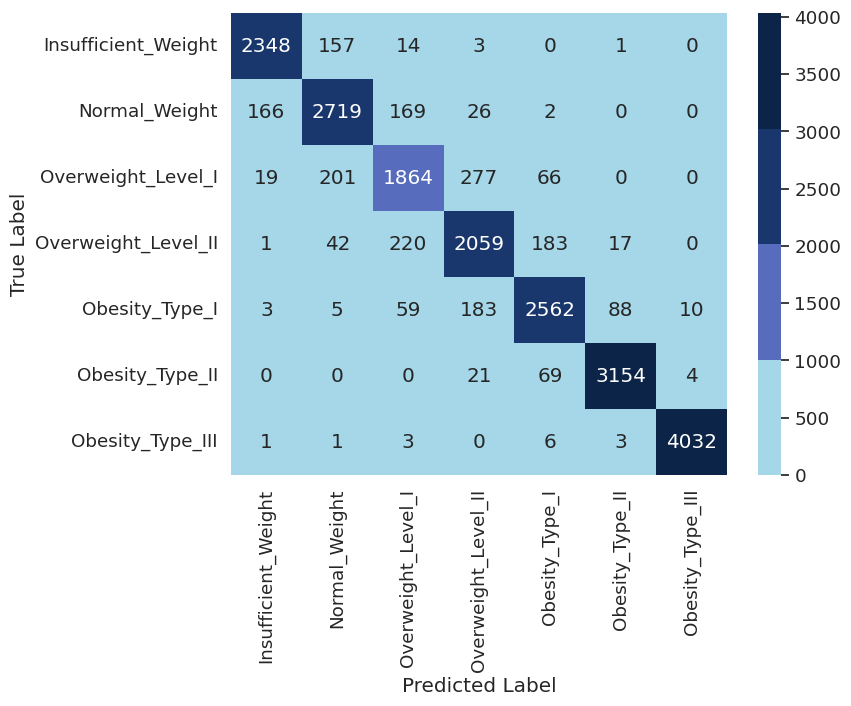

In [47]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom, 
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

From the overview of the error analysis, a step that always to be taken when working with tabular data, it seems that the decision boundaries between certain categories, in particular Overweight_Level_I and Overweight_Level_II, are not so well defined. In such cases it is helpful to use blended submissions between different but equally predictive models, to have better shaped class boundaries.

A solution, in our case, would be to blend our XGBoost with another gradient boosting solution, such as a LightGBM.

In [48]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(boosting_type="gbdt",
                     objective="multiclass",
                     metric="multi_logloss",
                     num_class=7,
                     learning_rate=0.025,
                     n_estimators=500,
                     lambda_l1=0.06,
                     lambda_l2=0.3,
                     max_depth=9,
                     colsample_bytree=0.40,
                     subsample=0.85,
                     min_child_samples=15,
                     verbosity=-1)

cv_splits = cv.split(train, y=target_numeric)

cv_results = cross_validate(lgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


Cross-validated Accuracy: 0.909


                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93      2523
      Normal_Weight       0.88      0.89      0.89      3082
 Overweight_Level_I       0.81      0.78      0.80      2427
Overweight_Level_II       0.81      0.82      0.82      2522
     Obesity_Type_I       0.89      0.89      0.89      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.91     20758
          macro avg       0.90      0.90      0.90     20758
       weighted avg       0.91      0.91      0.91     20758



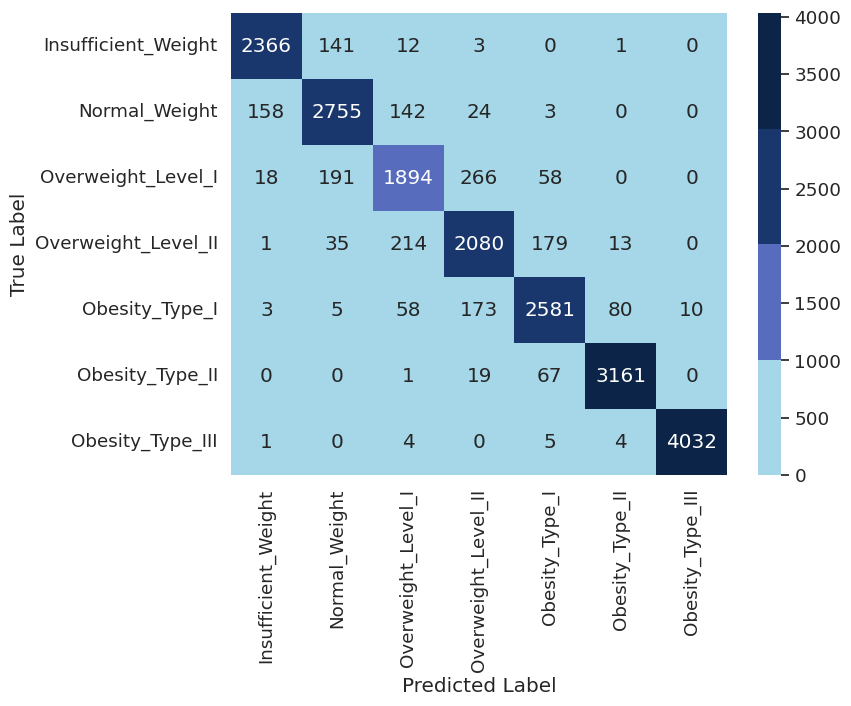

maximum possible improvement: 0.017


In [49]:
cv_splits = cv.split(train, y=target_numeric)
cv_cls_lgb_preds = cross_val_predict(lgb, train, target_numeric, cv=cv_splits)

print(classification_report(y_true=target_numeric, y_pred=cv_cls_lgb_preds, target_names=target_encoder.classes_))

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_lgb_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom, 
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

improvement = np.sum((cv_cls_lgb_preds==target_numeric)&(cv_cls_preds!=target_numeric)) / len(target_numeric)
print(f"maximum possible improvement: {improvement:0.3f}")

training a LightGBM and doing some error analysis, does perform slightly better than XGBoost on the problematic classes. An estimation of possible maximum improvement considering only the correct estimates (not the erroneous ones) that a LightGBM could bring in a blend seems promising.

Before proceeding, however, let's test how the new multi output tree, which is especially designed for multiclass problem, could work.

As of XGBoost version 2.0, in fact, a new multi_strategy option has become available. the training parameter called multi_strategy allows you to specify how the model should handle multiple targets when constructing trees.

By default, when multi_strategy is set to "one_output_per_tree" (which is the default), XGBoost builds one model for each target. Each model is trained independently for its corresponding target.

Alternatively, when multi_strategy is set to "multi_output_tree," XGBoost constructs multi-output trees. In this mode, each leaf node of the tree is associated with all the targets, and the model learns to make joint predictions for multiple targets simultaneously. This allows to build a single, compact model.

Since the multi_output_tree option is a work in progress, at the moment it only supports cpu as a device.

In [50]:
%%time

xgb = XGBClassifier(booster='gbtree',
                    device = "cpu",
                    tree_method="hist",
                    multi_strategy="multi_output_tree", # for multi-output trees
                    objective='multi:softmax',  # 'multi:softmax' for multiclass classification
                    num_class=len(set(target_numeric)),  # Number of classes
                    n_estimators=300,
                    max_depth=6,
                    verbosity=0)

cv_splits = cv.split(train, y=target_numeric)

cv_results = cross_validate(xgb, train, target_numeric, cv=cv_splits, scoring=scorer, return_train_score=False)

accuracy_mean = cv_results['test_score'].mean()
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.901
CPU times: user 2min 50s, sys: 350 ms, total: 2min 50s
Wall time: 43.2 s


The solution is not bad, let's go for the faster binary relevance strategy, hence we can leverage the GPU, but let's consider the multi_output_strategy for a blended solution.

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93      2523
      Normal_Weight       0.87      0.88      0.87      3082
 Overweight_Level_I       0.79      0.76      0.77      2427
Overweight_Level_II       0.79      0.81      0.80      2522
     Obesity_Type_I       0.89      0.88      0.88      2910
    Obesity_Type_II       0.97      0.97      0.97      3248
   Obesity_Type_III       1.00      1.00      1.00      4046

           accuracy                           0.90     20758
          macro avg       0.89      0.89      0.89     20758
       weighted avg       0.90      0.90      0.90     20758



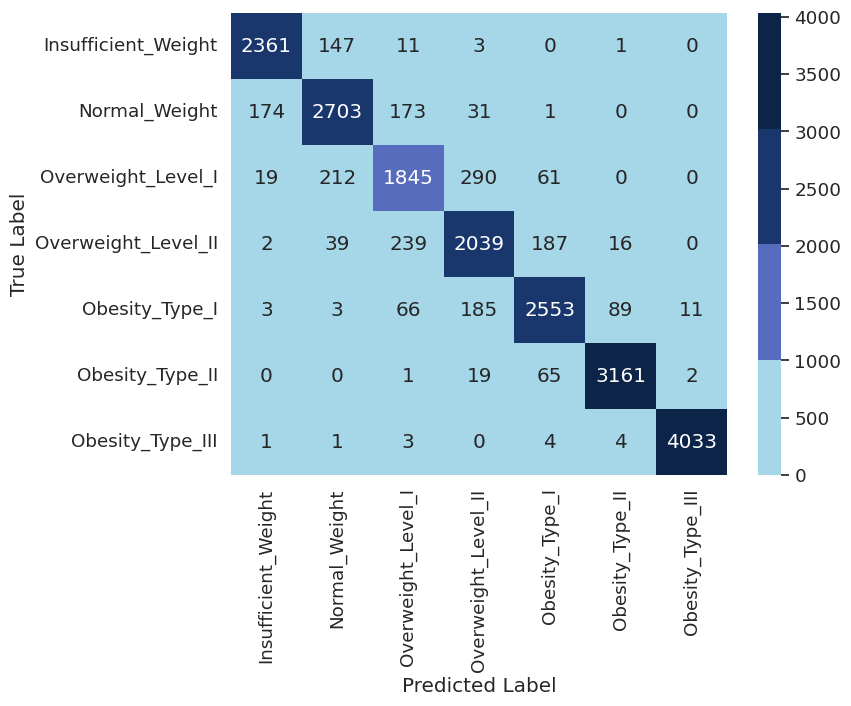

In [51]:
cv_splits = cv.split(train, y=target_numeric)
cv_cls_multi_preds = cross_val_predict(xgb, train, target_numeric, cv=cv_splits)

print(classification_report(y_true=target_numeric, y_pred=cv_cls_multi_preds, target_names=target_encoder.classes_))

conf_matrix = confusion_matrix(y_true=target_numeric, y_pred=cv_cls_multi_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom, 
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
improvement = np.sum((cv_cls_multi_preds==target_numeric)&(cv_cls_preds!=target_numeric)) / len(target_numeric)
print(f"maximum possible improvement: {improvement:0.3f}")

maximum possible improvement: 0.013


### 4.2 Approching the problem as a regression

Since the target is ordinal, we can test also operating using a regression instead of a classification

In [53]:
from xgboost import XGBRegressor

cv_splits = cv.split(train, y=target_numeric)
cv_scores = list()
cv_train_preds = np.zeros(len(train))
cv_test_preds = np.zeros(len(test))

for train_idx, val_idx in cv_splits:
    xgb = XGBRegressor(booster='gbtree',
                       device = "cpu",
                       tree_method="hist",
                       n_estimators=200,
                       max_depth=4,
                       verbosity=0)
    xgb.fit(train.iloc[train_idx], target_numeric.iloc[train_idx])
    preds = xgb.predict(train.iloc[val_idx])
    cv_train_preds[val_idx] = preds
    cv_test_preds += xgb.predict(test) / cv.n_splits
    cls_preds = np.clip(np.round(preds).astype(int), a_min=0, a_max=6)
    
    cv_scores.append(accuracy_score(y_true=target_numeric.iloc[val_idx], y_pred=cls_preds))

accuracy_mean = np.mean(cv_scores)
print(f'Cross-validated Accuracy: {accuracy_mean:.3f}')

Cross-validated Accuracy: 0.884


In [54]:
print(classification_report(y_true=target_numeric, 
                            y_pred=np.clip(np.round(cv_train_preds).astype(int), a_min=0, a_max=6), 
                            target_names=target_encoder.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92      2523
      Normal_Weight       0.86      0.86      0.86      3082
 Overweight_Level_I       0.76      0.74      0.75      2427
Overweight_Level_II       0.74      0.78      0.76      2522
     Obesity_Type_I       0.87      0.84      0.85      2910
    Obesity_Type_II       0.96      0.96      0.96      3248
   Obesity_Type_III       1.00      0.99      1.00      4046

           accuracy                           0.88     20758
          macro avg       0.87      0.87      0.87     20758
       weighted avg       0.88      0.88      0.88     20758



The problems with this predictor are again the first two overweight categories, it tend to appear a weaker solution though, than using multiclass classification. 

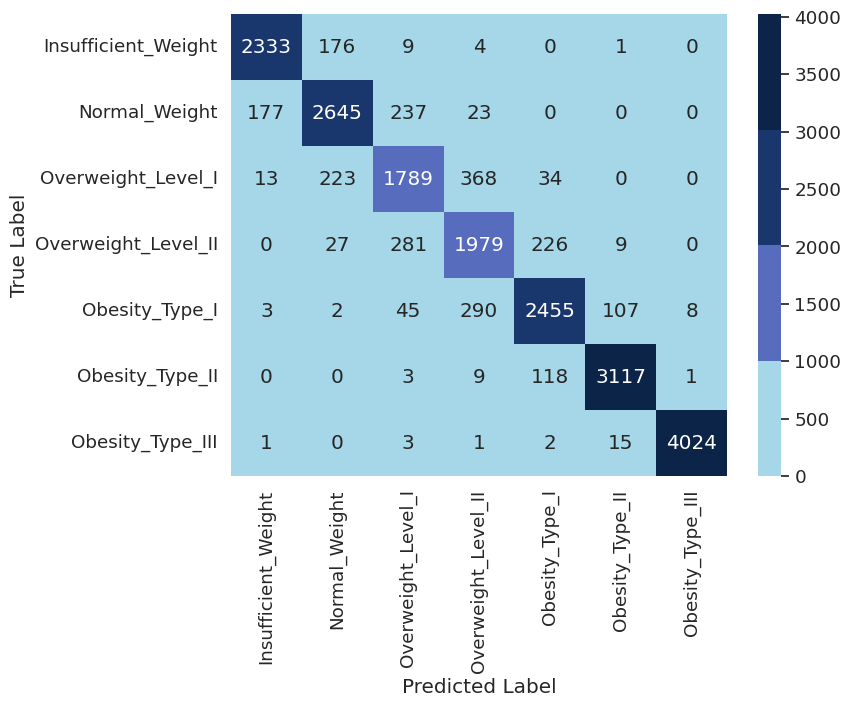

In [55]:
conf_matrix = confusion_matrix(y_true=target_numeric, 
                               y_pred=np.clip(np.round(cv_train_preds).astype(int), a_min=0, a_max=6))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom, 
            xticklabels=sorted_labels, yticklabels=sorted_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The results from the regression are disappointing, but the regression's results could be improved and possibly be used as a feature for the classification.

### 4.3 Model optimization by Optuna and Bayesian search

As a next step we optimize XGBoost most important hyper-parameters using a bayesian search by Optuna. The TPESampler is set to first try random optimization for the first 30 trials and then perform a TPE Bayesian Search. We also use the multivariate approach (added in v2.2.0 as an experimental feature), which is reported to outperform the independent TPE.

In [56]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 16),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
        
    }
    
    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softmax'
    params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "hist"
    
    xgb = XGBClassifier(**params)
    cv_splits = cv.split(train, y=target_numeric)

    cv_scores = cross_validate(estimator=xgb, 
                               X=train, 
                               y=target_numeric,
                               scoring=scorer,
                               cv=cv_splits)

    cv_evaluation = np.mean(np.abs(cv_scores['test_score']))
    return cv_evaluation

sqlite_db = "sqlite:///sqlite.db"
study_name = "multi_class_prediction_of_obesity_risk"
study = optuna.create_study(storage=sqlite_db, study_name=study_name, 
                            sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0),
                            direction="maximize", load_if_exists=True)

study.optimize(objective, n_trials=150)
print(f"best optmized accuracy: {study.best_value:0.5f}")
print(f"best hyperparameters: {study.best_params}")

best_cls_params = study.best_params
best_cls_params['objective'] = 'multi:softmax'
best_cls_params['tree_method'] = "hist"
best_cls_params["device"] = "cuda"
best_cls_params["verbosity"] = 0

/opt/conda/lib/python3.10/site-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-02-26 08:03:44,895] A new study created in RDB with name: multi_class_prediction_of_obesity_risk
[I 2024-02-26 08:04:29,835] Trial 0 finished with value: 0.904952587045209 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 643, 'learning_rate': 0.1229607110732571, 'gamma': 0.21182740024579755, 'subsample': 0.7521258791466592, 'colsample_bytree': 0.6063110478838847, 'max_depth': 15, 'min_child_weight': 7, 'reg_lambda': 1.65141683303417e-05, 'reg_alpha': 0.5116528751408895}. Best is trial 0 with value: 0.904952587045209.
[I 2024-02-26 08:05:45,501] Trial 1 finished with value: 0.8991717528427117 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 933, 'learning_rate': 0.013869861245357327, 'gamma': 0.04356465076364105, 'subsample': 0.314152878208228, 'colsam

best optmized accuracy: 0.90977
best hyperparameters: {'grow_policy': 'lossguide', 'n_estimators': 765, 'learning_rate': 0.01838214450298621, 'gamma': 0.061323782313901426, 'subsample': 0.6173117368877042, 'colsample_bytree': 0.33285037232496795, 'max_depth': 11, 'min_child_weight': 7, 'reg_lambda': 9.519119079026137e-07, 'reg_alpha': 0.0050221971838310545}


### 4.4 Re-train on all data

Once we obtained the best parameters, we re-train on all our available data

In [57]:
xgb = XGBClassifier(**best_cls_params)
xgb.fit(train, target_numeric)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.33285037232496795, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.061323782313901426,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.01838214450298621,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=765, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

The we proceed to inference, convert outputted numeric labels into strings and then save everything into a submission

## 5.0 Explainability

To understand how the model actually works, the XGBoost model itself, represented by the booster, is used to calculate SHAP (SHapley Additive exPlanations) values for each feature in the training data. The feature names are extracted from the 'train' DataFrame, and a DMatrix 'Xd' is created to represent the training data in a format suitable for XGBoost. The SHAP values are obtained by predicting contributions to the predictions using the 'predict' method with 'pred_contribs=True'. 

In [58]:
from xgboost import DMatrix

booster = xgb.get_booster()

feature_names = train.columns
Xd = DMatrix(train)

shap_values = booster.predict(Xd, pred_contribs=True)
preds = booster.predict(Xd)

then we create a summary plot visualizing the impact of different features on the model predictions. The shap.summary_plot function is employed to generate a violin plot, where each violin represents the distribution of SHAP values for a specific feature. 

In [59]:
shap_values[:,0,:-1].shape

(20758, 37)

In [60]:
target_encoder.classes_

['Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III']

In [61]:
train.shape

(20758, 37)

VIOLIN PLOT REPRESENTING <Insufficient_Weight>


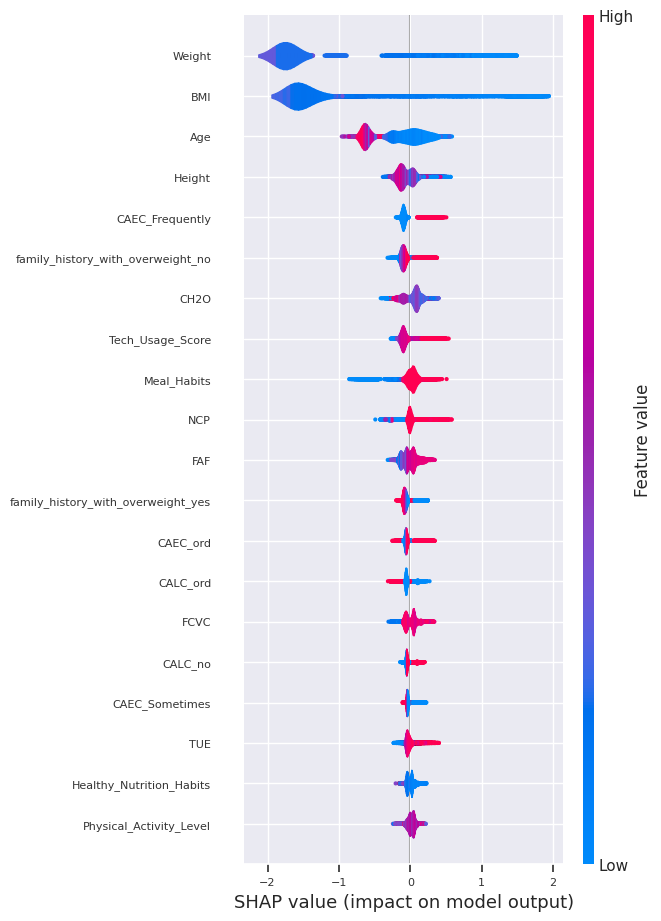


VIOLIN PLOT REPRESENTING <Normal_Weight>


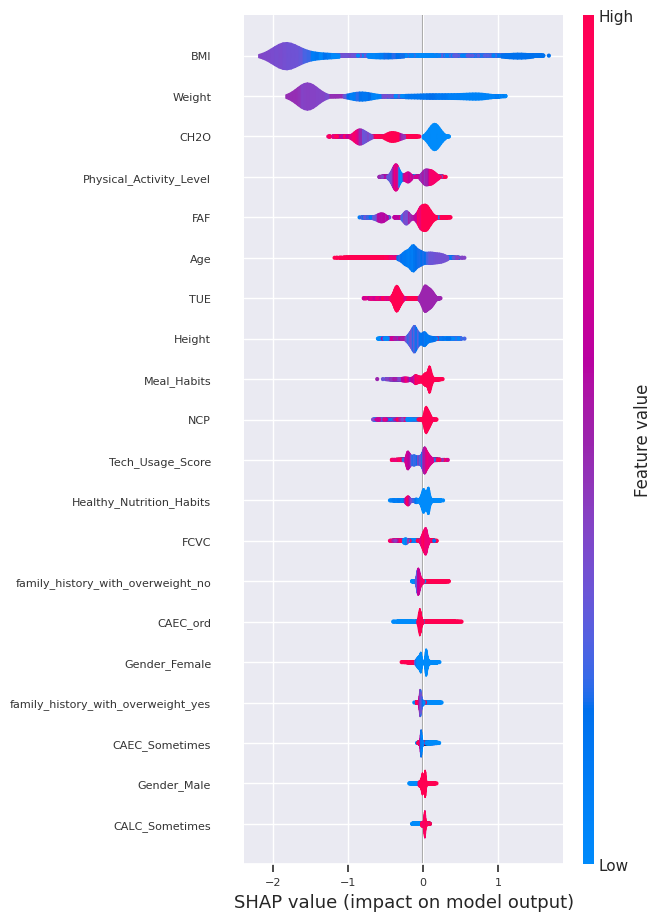


VIOLIN PLOT REPRESENTING <Overweight_Level_I>


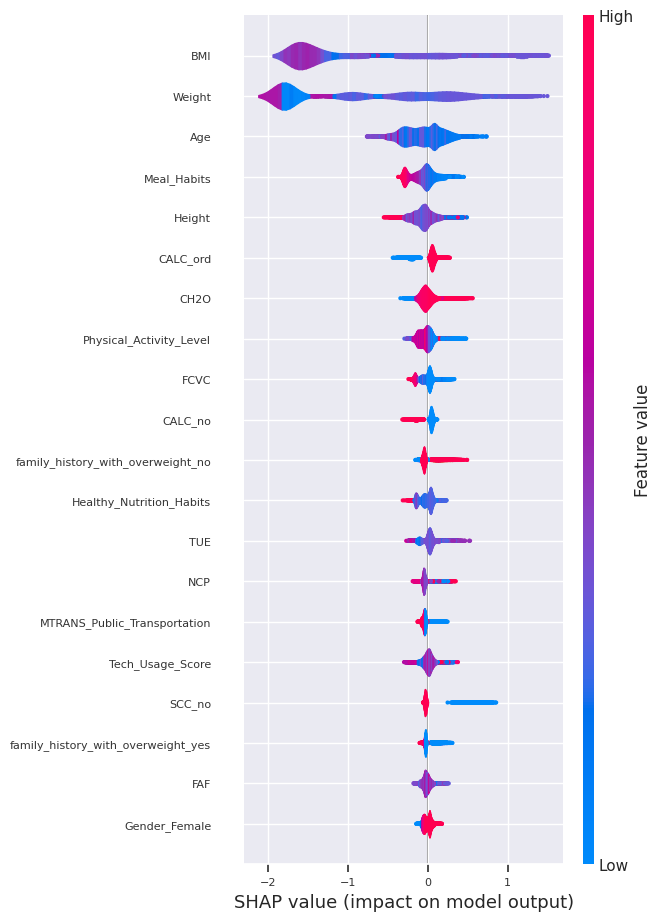


VIOLIN PLOT REPRESENTING <Overweight_Level_II>


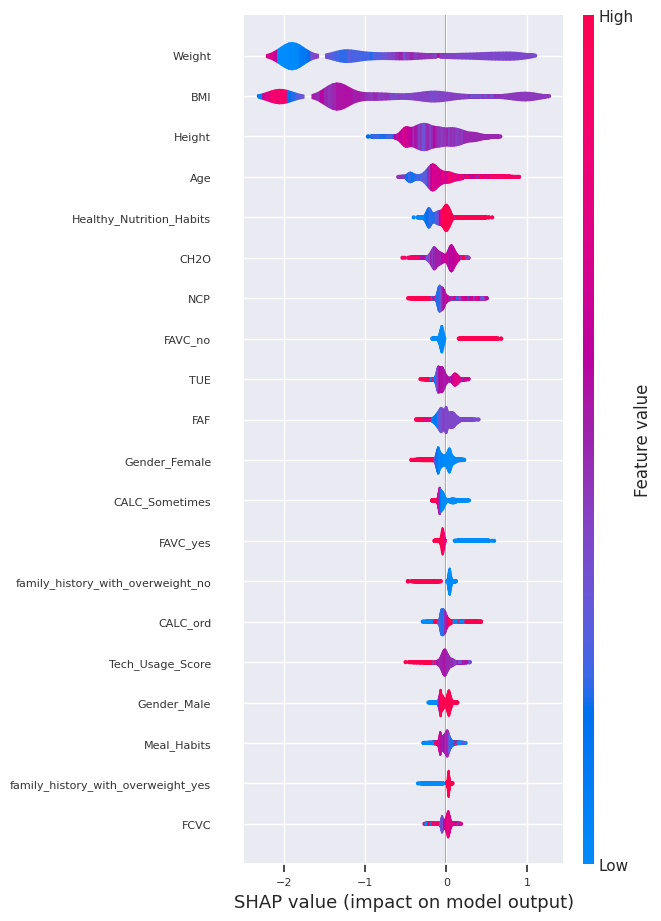


VIOLIN PLOT REPRESENTING <Obesity_Type_I>


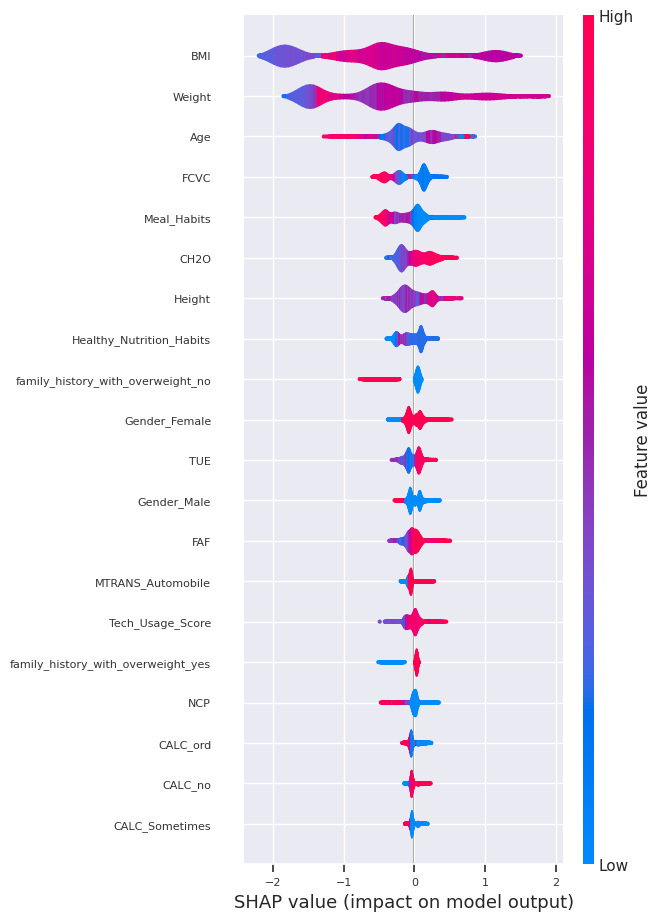


VIOLIN PLOT REPRESENTING <Obesity_Type_II>


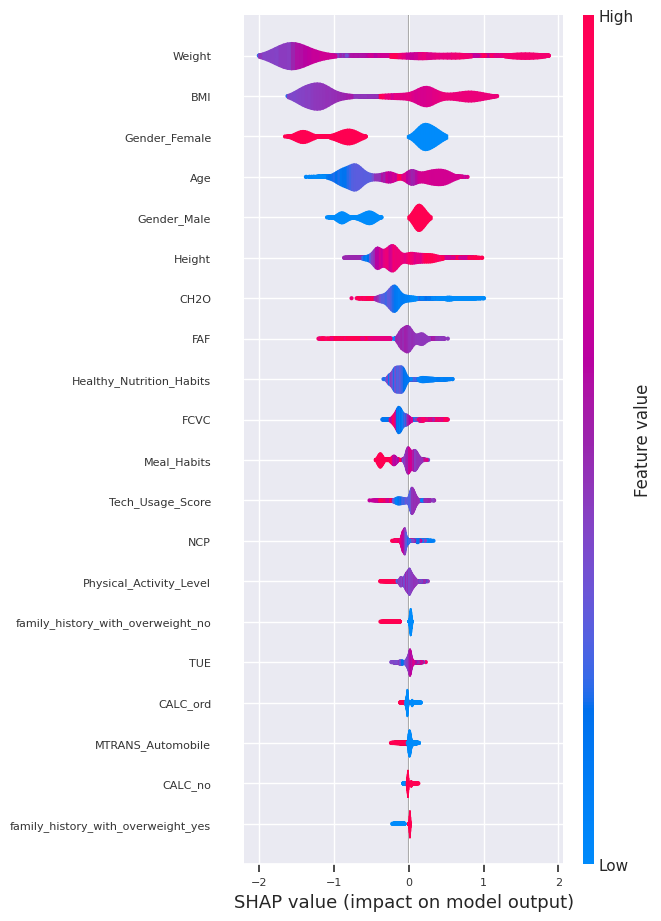


VIOLIN PLOT REPRESENTING <Obesity_Type_III>


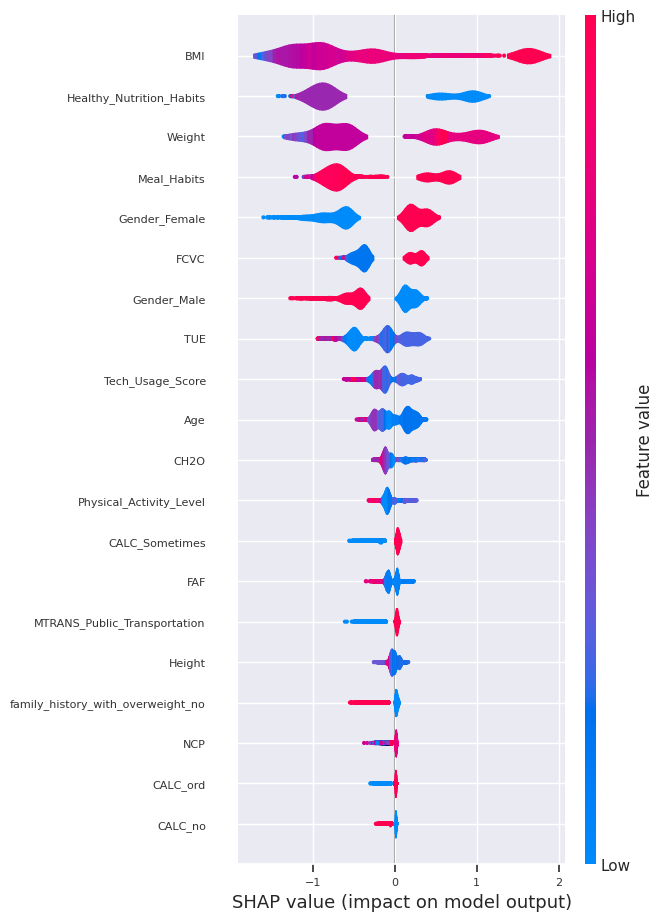

In [62]:
import shap
import matplotlib.pyplot as plt

for k, target_label in enumerate(target_encoder.classes_):
    print(f"VIOLIN PLOT REPRESENTING <{target_label}>")
    shap.summary_plot(shap_values[:,k, :-1], train.values,
                      plot_type="violin",
                      feature_names=feature_names, show=False)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()
    print()

## 6.0 Preparation of the submission

In [63]:
preds = xgb.predict(test)
labelled_preds = target_encoder.inverse_transform(preds)

In [64]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = labelled_preds.values
submission.to_csv("xgb_submission.csv", index=False)

In [65]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


## 7.0 Submission strategies

Now that our single model submission is ready, let's prepare an ensembled one with multiout XGBoost and LightGBM and check if it improves our results as we figured after error analysis.

In [66]:
from copy import copy

multi_cls_params = copy(best_cls_params)
multi_cls_params["device"] = "cpu"
multi_cls_params["tree_method"] = "hist"
multi_cls_params["multi_strategy"] = "multi_output_tree"

In [67]:
multi = XGBClassifier(**multi_cls_params)
multi.fit(train, target_numeric)

lgb = LGBMClassifier(boosting_type="gbdt",
                     objective="multiclass",
                     metric="multi_logloss",
                     num_class=7,
                     learning_rate=0.025,
                     n_estimators=500,
                     lambda_l1=0.06,
                     lambda_l2=0.3,
                     max_depth=9,
                     colsample_bytree=0.40,
                     subsample=0.85,
                     min_child_samples=15,
                     verbosity=-1)

lgb.fit(train, target_numeric)

xgb_preds = xgb.predict_proba(test)
lgb_preds = lgb.predict_proba(test)
multixgb_preds = multi.predict_proba(test)

blended_preds = np.argmax((xgb_preds + lgb_preds + multixgb_preds), axis=1).ravel()
labelled_blended_preds = target_encoder.inverse_transform(blended_preds)

submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = labelled_blended_preds.values
submission.to_csv("blended_submission.csv", index=False)

In [68]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


Another strategy is to bag ((Bootstrap Aggregating) multiple times your model and then blend the results. This should result in more stable results in the private leaderboard

In [69]:
from tqdm import tqdm

boots = 300

for k in tqdm(range(boots)):
    bootstrap_idx = np.random.choice(train.index, size=len(train), replace=True)

    xgb = XGBClassifier(**best_cls_params)
    xgb.fit(train.loc[bootstrap_idx], target_numeric.loc[bootstrap_idx])
    if k==0:
        preds = xgb.predict_proba(test)
    else:
        preds += xgb.predict_proba(test)
        
blended_preds = np.argmax(preds, axis=1).ravel()
labelled_blended_preds = target_encoder.inverse_transform(blended_preds)

submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = labelled_blended_preds.values
submission.to_csv("bagged_submission.csv", index=False)

100%|██████████| 300/300 [2:40:15<00:00, 32.05s/it]


In [70]:
submission.head(5)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


Here we complete our overview of this multiclass problem. The next step in the competition is to feed the data we prepared to a auto-ml engine or build a blending or stacking solution that could bring you up the leaderboard. Good luck!